In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.colors as mcolors
from pandas.api.types import CategoricalDtype

In [96]:
# Define the function to set bias values
def set_bias_value(bias):
    bias_value = 0
    if bias == 'left':
        bias_value = -2
    elif bias == 'left-center':
        bias_value = -1
    elif bias == 'center':
        bias_value = 0
    elif bias == 'right-center':
        bias_value = 1
    elif bias == 'right':
        bias_value = 2
    return bias_value

# Group by 'bias' and apply custom logic to select rows
def select_rows(group):
    if group['bias_value_final'].iloc[0] < 0:
        return group.head(5)  # Select first five rows for negative values
    else:
        return group.tail(5)  # Select last five rows for positive values

# Define the function to select rows
def select_rows(group):
    return group[['name', 'bias', 'total_votes', 'agree_ratio', 'bias_value', 'bias_value_final']].head(5) if group['bias_value_final'].iloc[0] < 0 else group[['name', 'bias', 'total_votes', 'agree_ratio', 'bias_value', 'bias_value_final']].tail(5)

In [97]:
# Set the base directory path
base_directory = r'C:\Users\kdiaz\OneDrive\Documents\Personal\Random Code\Media_Bias'

# Set the CSV file name and folder
csv_folder = 'data'
csv_file_name = 'allsides.csv'

# Create the full path to the CSV file
csv_file_path = os.path.abspath(os.path.join(base_directory, csv_folder, csv_file_name))

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

In [98]:
# Get a feel for the data by sampling it
df.sample(10)

,name,bias,total_votes,agree,disagree,agree_ratio,agreeance_text,allsides_page
365,The Lufkin Daily News,center,25,14,11,1.272727,Somewhat Agrees,https://www.allsides.com/news-source/lufkin-da...
50,Center for Public Integrity,left-center,1665,765,900,0.850000,Somewhat Disagrees,https://www.allsides.com/news-source/center-pu...
105,Esquire,left,1923,1309,614,2.131922,Strongly Agrees,https://www.allsides.com/news-source/esquire
43,C-SPAN,center,5467,4129,1338,3.085949,Absolutely Agrees,https://www.allsides.com/news-source/c-span
411,USA TODAY,left-center,38859,18270,20589,0.887367,Somewhat Disagrees,https://www.allsides.com/news-source/usa-today...
26,Bizpac Review,right,173,115,58,1.982759,Agrees,https://www.allsides.com/news-source/bizpac-re...
244,PBS NewsHour,center,6201,3550,2651,1.339117,Somewhat Agrees,https://www.allsides.com/news-source/pbs-newshour
330,The Center Square - Michigan,center,249,88,161,0.546584,Disagrees,https://www.allsides.com/news-source/center-sq...
195,Media Village,center,12,4,8,0.500000,Strongly Disagrees,https://www.allsides.com/news-source/media-vil...
364,The Lincoln Project,allsides,273,41,232,0.176724,Absolutely Disagrees,https://www.allsides.com/news-source/lincoln-p...


In [99]:
# Generate statistics on the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_votes,442.0,5175.343891,14742.131389,1.000000,210.250000,684.000000,1771.250000,179490.000000
agree,442.0,3024.061086,8372.766040,1.000000,115.500000,326.500000,1002.500000,99383.000000
disagree,442.0,2151.285068,6687.102635,1.000000,99.250000,311.500000,770.500000,80107.000000
agree_ratio,442.0,1.366611,0.829768,0.176724,0.869924,1.109122,1.621232,6.757684


In [100]:
# Descriptive Statistics
print(df.describe(include='all'))

                     name    bias    total_votes         agree      disagree  \
count                 442     442     442.000000    442.000000    442.000000   
unique                442       6            NaN           NaN           NaN   
top     ABC News (Online)  center            NaN           NaN           NaN   
freq                    1     167            NaN           NaN           NaN   
mean                  NaN     NaN    5175.343891   3024.061086   2151.285068   
std                   NaN     NaN   14742.131389   8372.766040   6687.102635   
min                   NaN     NaN       1.000000      1.000000      1.000000   
25%                   NaN     NaN     210.250000    115.500000     99.250000   
50%                   NaN     NaN     684.000000    326.500000    311.500000   
75%                   NaN     NaN    1771.250000   1002.500000    770.500000   
max                   NaN     NaN  179490.000000  99383.000000  80107.000000   

        agree_ratio      agreeance_text

In [101]:
# Check for null values
pd.isnull(df).sum()

name              0
bias              0
total_votes       0
agree             0
disagree          0
agree_ratio       0
agreeance_text    0
allsides_page     0
dtype: int64

In [102]:
# Check how many duplicated values are in the data
df.duplicated().sum()

0

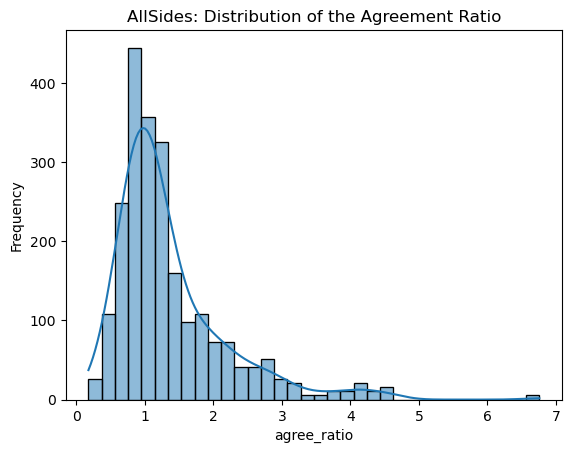

In [133]:
# Distribution of agree_ratio
sns.histplot(data=df, x='agree_ratio', stat='frequency', kde=True)
plt.title("AllSides: Distribution of the Agreement Ratio")
plt.show()

In [136]:
# Define the bias order
bias_order = ['left', 'left-center', 'center', 'right-center', 'right']
df['bias'] = pd.Categorical(df['bias'], categories=bias_order, ordered=True)
df = df.loc[df.bias != 'allsides']

# Map the bias values using the previously defined set_bias_value function
df['bias_value'] = df['bias'].map(set_bias_value)

# Calculate the final bias score
df['bias_value_final'] = df['bias_value'].astype(float) * df['agree_ratio']

# Sort the DataFrame by the final bias score then the agree ratio
df = df.sort_values(by=['bias_value_final', 'agree_ratio'], ascending=[True, False]).reset_index(drop=True)
result_df = df.groupby('bias', observed=True).apply(select_rows)

# Show the most biased media sources based based on final bias value
result_df

C:\Users\kdiaz\AppData\Local\Temp\ipykernel_30920\1087440445.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby('bias', observed=True).apply(select_rows)


name          bias  total_votes  \
bias                                                                  
left         0              Mother Jones          left        17416   
             1                  AlterNet          left        16591   
             2             CNN (Opinion)          left        40486   
             3             Democracy Now          left        16298   
             4            The New Yorker          left        11568   
left-center  61        The Texas Tribune   left-center          702   
             63        ABC News (Online)   left-center        53210   
             65        The Onion (Humor)   left-center          601   
             66            Above The Law   left-center          405   
             67             CNN Business   left-center          331   
center       336               Patch.com        center           95   
             337    Outkick the Coverage        center           81   
             338           The Oregonian        center          167   
             339                 Variety        center          116   
             340  Los Angeles Daily News        center          123   
right-center 389        Washington Times  right-center        41356   
             390         The Epoch Times  right-center        16616   
             392      The Telegraph - UK  right-center         2529   
             393     Washington Examiner  right-center        17996   
             404     Babylon Bee (Humor)  right-center          815   
right        437          The Federalist         right        11785   
             438          Breitbart News         right        50379   
             439      The National Pulse         right          574   
             440      Fox News (Opinion)         right        34262   
             441                InfoWars         right         6395   

                  agree_ratio  bias_value  bias_value_final  
bias                                                         
left         0       6.757684          -2        -13.515367  
             1       4.620257          -2         -9.240515  
             2       4.532386          -2         -9.064772  
             3       4.347113          -2         -8.694226  
             4       4.152784          -2         -8.305568  
left-center  61      2.190909          -1         -2.190909  
             63      1.971132          -1         -1.971132  
             65      1.917476          -1         -1.917476  
             66      1.913669          -1         -1.913669  
             67      1.878261          -1         -1.878261  
center       336     0.376812           0          0.000000  
             337     0.372881           0          0.000000  
             338     0.357724           0          0.000000  
             339     0.348837           0          0.000000  
             340     0.322581           0          0.000000  
right-center 389     2.092037           1          2.092037  
             390     2.093075           1          2.093075  
             392     2.165207           1          2.165207  
             393     2.172219           1          2.172219  
             404     2.704545           1          2.704545  
right        437     3.263748           2          6.527496  
             438     3.491308           2          6.982616  
             439     4.079646           2          8.159292  
             440     4.263789           2          8.527577  
             441     4.565709           2          9.131419

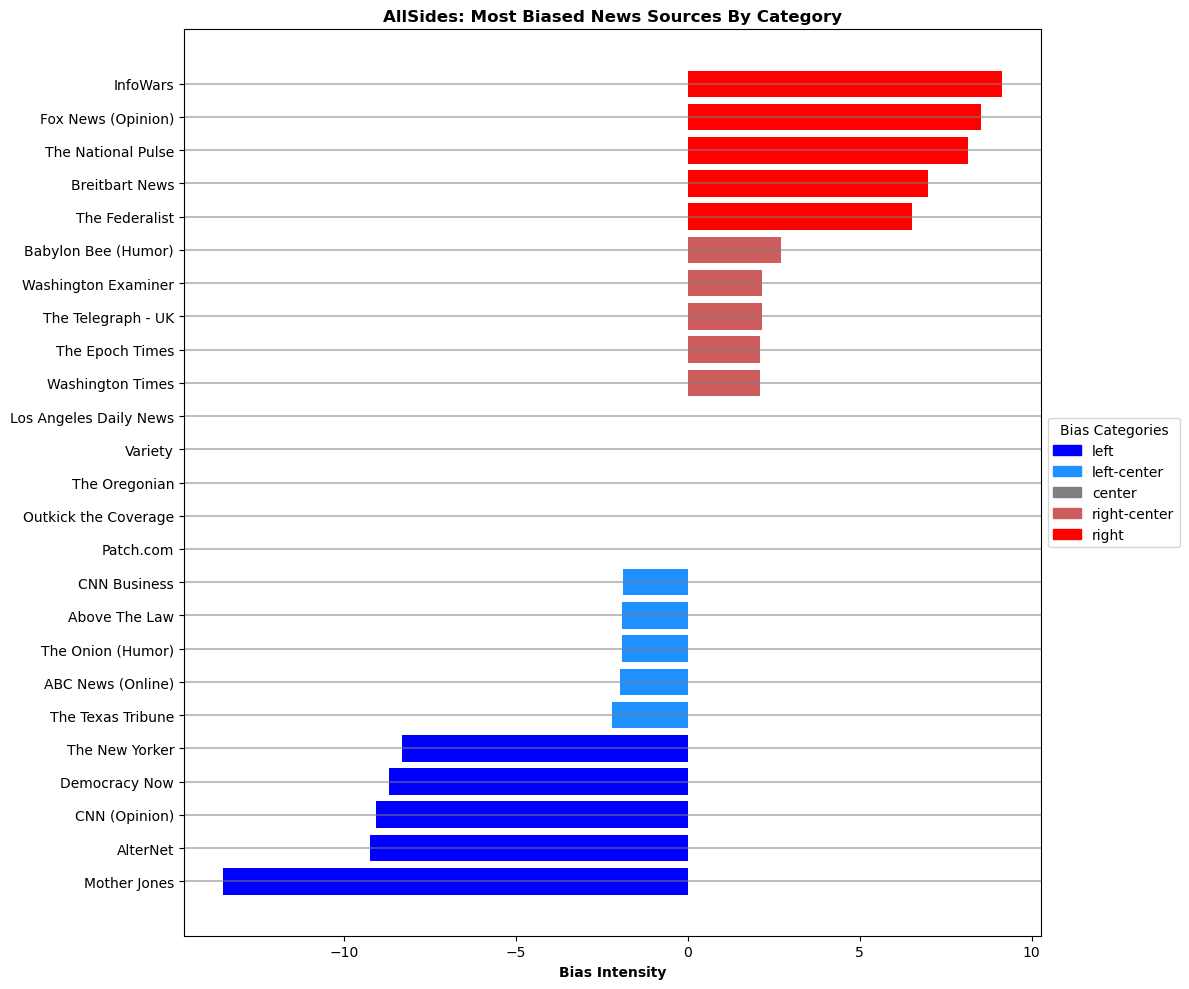

In [137]:
# Define the color gradient for the bar chart
colors = {'left': 'blue', 'left-center': 'dodgerblue', 'center': 'gray', 'right-center': 'indianred', 'right': 'red'}
bias_colors = [colors[bias] for bias in result_df['bias']]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figure size as needed
bars = ax.barh(result_df['name'], result_df['bias_value_final'], color=bias_colors)
ax.set_title('AllSides: Most Biased News Sources By Category', weight='bold')

# Create a color key
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = colors.keys()
legend_title = 'Bias Categories'
plt.legend(handles, labels, title=legend_title, loc='center left', bbox_to_anchor=(1, 0.5))

# Add horizontal lines behind the bars
for y, name in enumerate(result_df['name']):
    ax.axhline(y, color='gray', alpha=0.5)

# Add a label for bias intensity below the x-axis
ax.set_xlabel('Bias Intensity', weight='bold')

plt.tight_layout()
plt.show()